In [7]:
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [8]:
train_set = pd.read_csv('train_data.csv')
val_set = pd.read_csv('val_data.csv')
test_set = pd.read_csv('test_data.csv')
print(len(train_set), len(val_set), len(test_set))
train_set.head()

9059 2265 2831


,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Unique Received From Addresses,min value received,max value received,avg val received,min val sent,avg val sent,total transactions (including tnx to create contract,total ether received,total ether balance
0,0x1f91d2d3ff8ce66dd75ab221f370c71c431dd659,1,333.22,1836.33,157384.67,66,0.018293,1.609584,0.264718,0.009007,0.335513,134,19.853878,0.058596
1,0x4684d57d2fe38b7990d6d82760922da0928e4eda,1,0.00,269.50,206082.30,10,0.088038,2.030283,0.790670,7.905838,7.905838,11,7.906699,0.000861
2,0x570208193f67c138ba3dd60a3aee9b0fa9d574c2,0,6180.19,3503.34,551924.28,14,0.002108,15.000000,3.704406,0.000000,1.856308,101,100.018959,-37.347870
3,0x5ffc014343cd971b7eb70732021e26c35b744cc4,0,0.00,47.60,475945.68,4594,0.000000,0.103400,0.000069,0.000000,0.000000,10000,0.692556,0.692556
4,0x6ce81b6206a73dc33f7635942905fdb3fd1e21bf,0,0.00,1955.01,226781.43,3,0.000000,0.463344,0.233199,0.000000,0.000000,117,27.051093,27.051093


In [9]:
train_set = train_set.dropna()
val_set = val_set.dropna()
test_set = test_set.dropna()
print(len(train_set), len(val_set), len(test_set))
train_set.head()

9059 2265 2831


,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Unique Received From Addresses,min value received,max value received,avg val received,min val sent,avg val sent,total transactions (including tnx to create contract,total ether received,total ether balance
0,0x1f91d2d3ff8ce66dd75ab221f370c71c431dd659,1,333.22,1836.33,157384.67,66,0.018293,1.609584,0.264718,0.009007,0.335513,134,19.853878,0.058596
1,0x4684d57d2fe38b7990d6d82760922da0928e4eda,1,0.00,269.50,206082.30,10,0.088038,2.030283,0.790670,7.905838,7.905838,11,7.906699,0.000861
2,0x570208193f67c138ba3dd60a3aee9b0fa9d574c2,0,6180.19,3503.34,551924.28,14,0.002108,15.000000,3.704406,0.000000,1.856308,101,100.018959,-37.347870
3,0x5ffc014343cd971b7eb70732021e26c35b744cc4,0,0.00,47.60,475945.68,4594,0.000000,0.103400,0.000069,0.000000,0.000000,10000,0.692556,0.692556
4,0x6ce81b6206a73dc33f7635942905fdb3fd1e21bf,0,0.00,1955.01,226781.43,3,0.000000,0.463344,0.233199,0.000000,0.000000,117,27.051093,27.051093


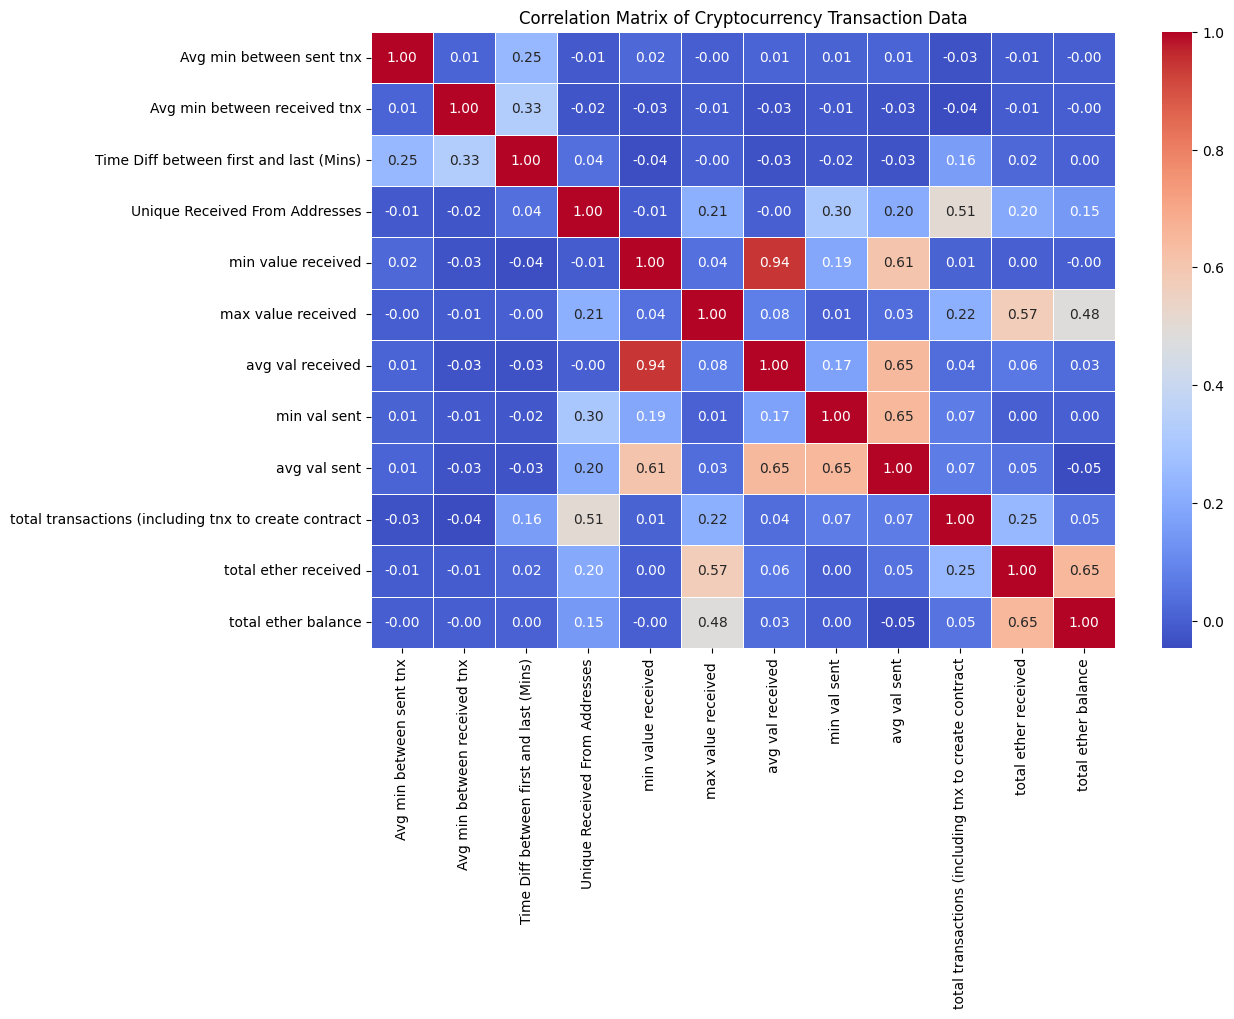

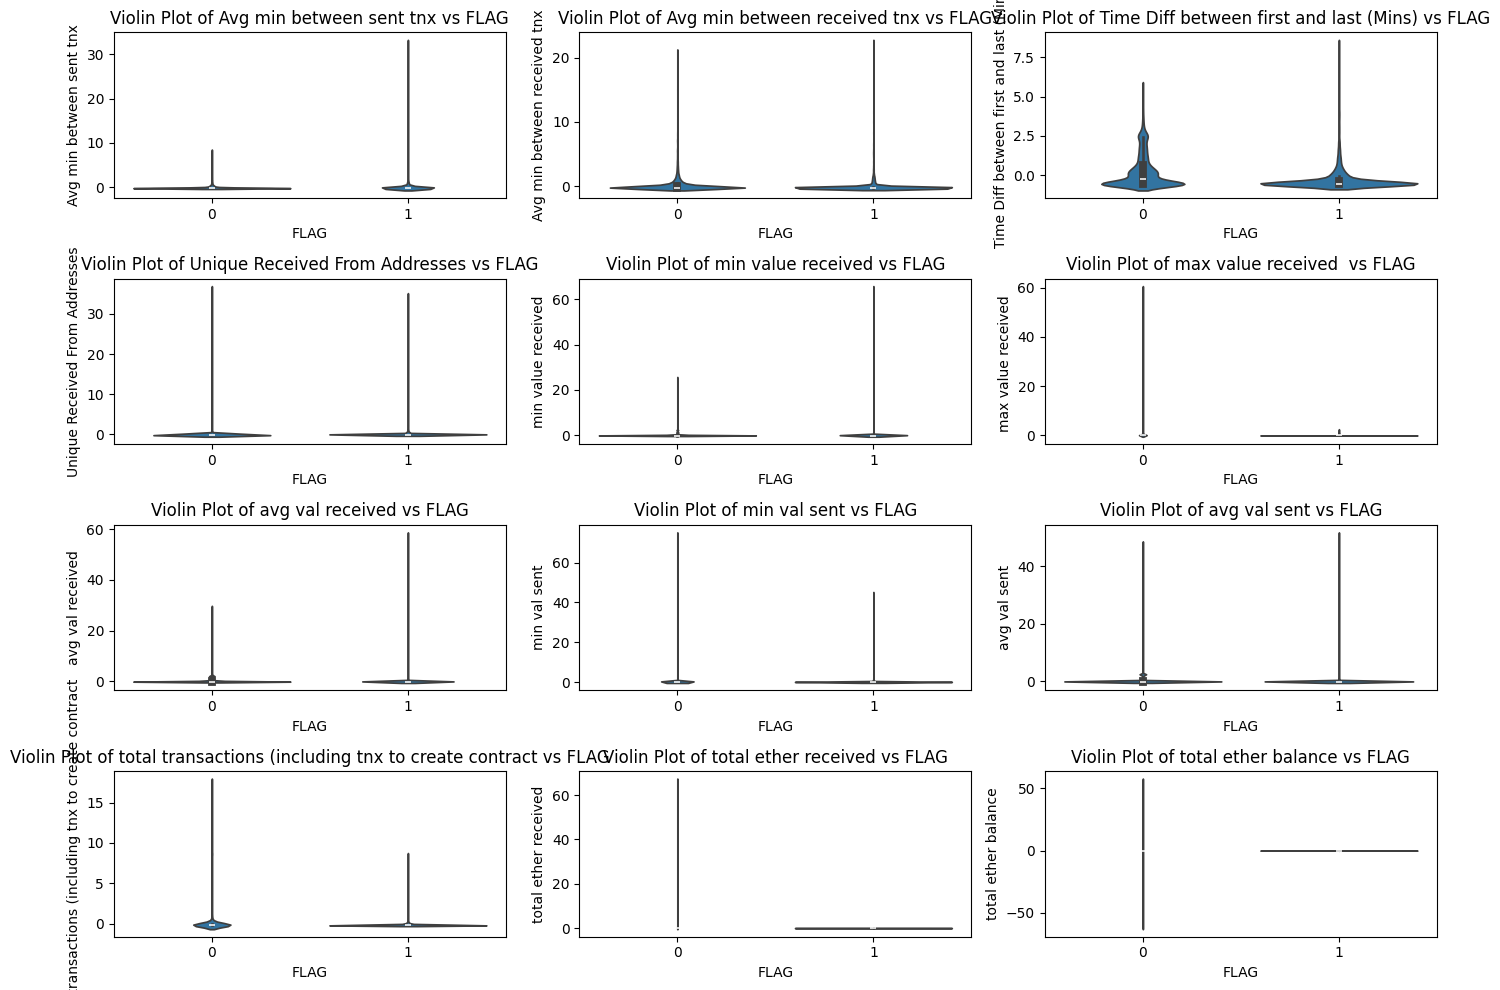

In [10]:
train_labels = train_set['FLAG']
val_labels = val_set['FLAG']
test_labels = test_set['FLAG']
train_set = train_set.drop(columns=['Address', 'FLAG']).reset_index(drop=True)
val_set = val_set.drop(columns=['Address', 'FLAG']).reset_index(drop=True)
test_set = test_set.drop(columns=['Address', 'FLAG']).reset_index(drop=True)
cols = train_set.columns
scaler = StandardScaler()
train_set = pd.DataFrame(scaler.fit_transform(train_set), columns=cols)
val_set = pd.DataFrame(scaler.transform(val_set), columns=cols)
test_set = pd.DataFrame(scaler.transform(test_set), columns=cols)

plt.figure(figsize=(12, 8))
sns.heatmap(train_set.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Cryptocurrency Transaction Data")
plt.show()


plt.figure(figsize=(14, 10))
for i, feature in enumerate(cols, 1):
    plt.subplot(4, 3, i)
    sns.violinplot(x=train_labels, y=train_set[feature])
    plt.title(f'Violin Plot of {feature} vs FLAG')
plt.tight_layout()
plt.show()

# Observations
### Correlation matrix

- High correlation between `min_value_received` and `avg_value_receieved` implies that most transactions at the receiving end were of similar sizes

### Violin plots of variables vs FLAG
- Higher values of sent/received transactions, longer transaction durations, and more unique address interactions are common in FLAG = 1 transactions
- The wide variance in flagged transactions suggests some outliers exist, which could indicate different types of fraudulent behavior

In [11]:
X_train = train_set.values
X_val = val_set.values
X_test = test_set.values
y_train = train_labels.values
y_val = val_labels.values
y_test = test_labels.values

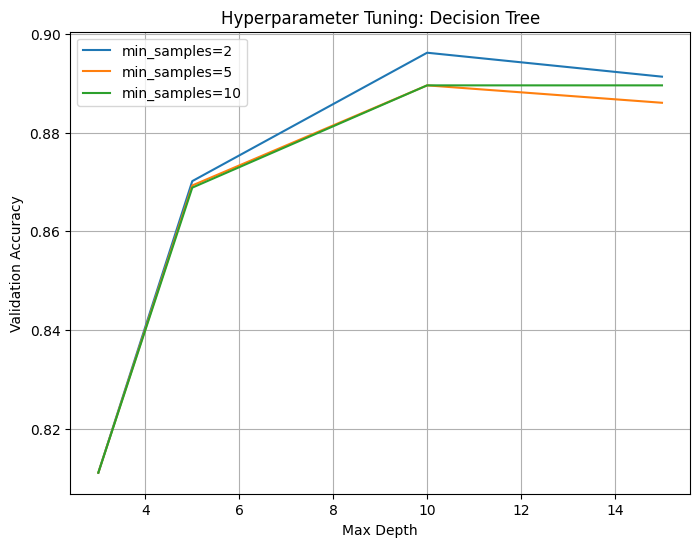

In [13]:
class DecisionTreeCustom():
    def __init__(self, max_depth=5, min_samples_split=2, criterion="gini"):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        self.tree = None

    def fit(self, X, y):
        self.tree = self.build_tree(X, y, depth=0)

    def gini_impurity(self, y):
        classes = np.unique(y)
        impurity = 1
        for c in classes:
            p = np.sum(y == c) / len(y)
            impurity -= p ** 2
        return impurity

    def entropy(self, y):
        classes = np.unique(y)
        entropy = 0
        for c in classes:
            p = np.sum(y == c) / len(y)
            if p > 0:
                entropy -= p * np.log2(p)  
        return entropy

    def best_split(self, X, y):
        best_gain = -1
        best_split = None
        for feature_idx in range(X.shape[1]):
            values = np.unique(X[:, feature_idx])
            for val in values:
                left_mask = X[:, feature_idx] <= val
                right_mask = X[:, feature_idx] > val

                if np.sum(left_mask) < self.min_samples_split or np.sum(right_mask) < self.min_samples_split:
                    continue

                y_left = y[left_mask]
                y_right = y[right_mask]
                impurity_func = self.gini_impurity if self.criterion == "gini" else self.entropy

                parent_impurity = impurity_func(y)
                weighted_child_impurity = (len(y_left) / len(y)) * impurity_func(y_left) + (len(y_right) / len(y)) * impurity_func(y_right)
                gain = parent_impurity - weighted_child_impurity

                if gain > best_gain:
                    best_gain = gain
                    best_split = (feature_idx, val)

        return best_split

    def build_tree(self, X, y, depth):
        if len(np.unique(y)) == 1 or depth == self.max_depth or len(y) < self.min_samples_split:
            return np.argmax(np.bincount(y))

        best_split = self.best_split(X, y)
        if best_split is None:
            return np.argmax(np.bincount(y))

        feature_idx, val = best_split
        left_mask = X[:, feature_idx] <= val
        right_mask = X[:, feature_idx] > val

        left_subtree = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self.build_tree(X[right_mask], y[right_mask], depth + 1)

        return (feature_idx, val, left_subtree, right_subtree)

    def predict_sample(self, x, node):
        if isinstance(node, np.int64):
            return node
        feature_idx, val, left_subtree, right_subtree = node
        if x[feature_idx] <= val:
            return self.predict_sample(x, left_subtree)
        else:
            return self.predict_sample(x, right_subtree)

    def predict(self, X):
        return np.array([self.predict_sample(x, self.tree) for x in X])

# Training and Evaluating Custom Decision Tree
def compute_metrics(y_true, y_pred):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for i in range(len(y_pred)):
        if y_pred[i] == y_true[i]:
            if y_pred[i] == 1:
                tp += 1
            else:
                tn += 1
        else:
            if y_pred[i] == 1:
                fp += 1
            else:
                fn += 1
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    confusion_matrix = np.array([[tn, fp], [fn, tp]])
    return accuracy, precision, recall, f1_score, confusion_matrix
criteria = ['entropy', 'gini']

depths = [3, 5, 10, 15]
min_samples_splits = [2, 5, 10]
results = {}

for depth in depths:
    for min_samples in min_samples_splits:
        tree = DecisionTreeCustom(max_depth=depth, min_samples_split=min_samples, criterion="gini")
        tree.fit(X_train, y_train)
        val_pred = tree.predict(X_val)
        val_acc, val_precision, val_recall, val_f1_score, val_confusion_matrix = compute_metrics(y_val, val_pred)
        results[(depth, min_samples)] = val_acc

plt.figure(figsize=(8, 6))
for min_samples in min_samples_splits:
    plt.plot(depths, [results[(d, min_samples)] for d in depths], label=f"min_samples={min_samples}")

plt.xlabel("Max Depth")
plt.ylabel("Validation Accuracy")
plt.title("Hyperparameter Tuning: Decision Tree")
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_21264/3224722408.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f[0] for f in sorted_features], y=[f[1] for f in sorted_features], palette='viridis')


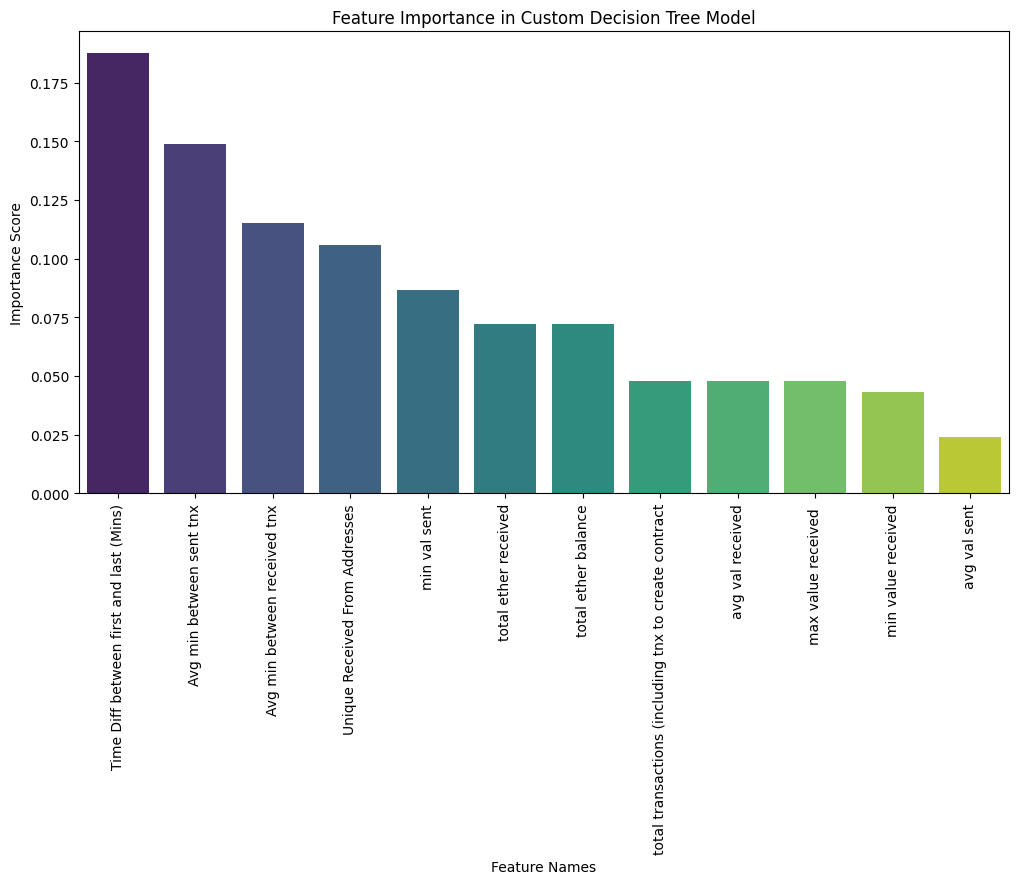

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.59902 to fit


Custom Decision Tree Performance with entropy criterion:
Accuracy: 0.9014
Precision: 0.9033
Recall: 0.8805
F1 Score: 0.8917
Confusion Matrix:
 [[1403  123]
 [ 156 1149]]

Scikit-Learn Decision Tree Performance with entropy criterion:
Accuracy: 0.9000
Precision: 0.8925
Recall: 0.8904
F1 Score: 0.8914
Confusion Matrix:
 [[1386  140]
 [ 143 1162]]


/tmp/ipykernel_21264/3224722408.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f[0] for f in sorted_features], y=[f[1] for f in sorted_features], palette='viridis')


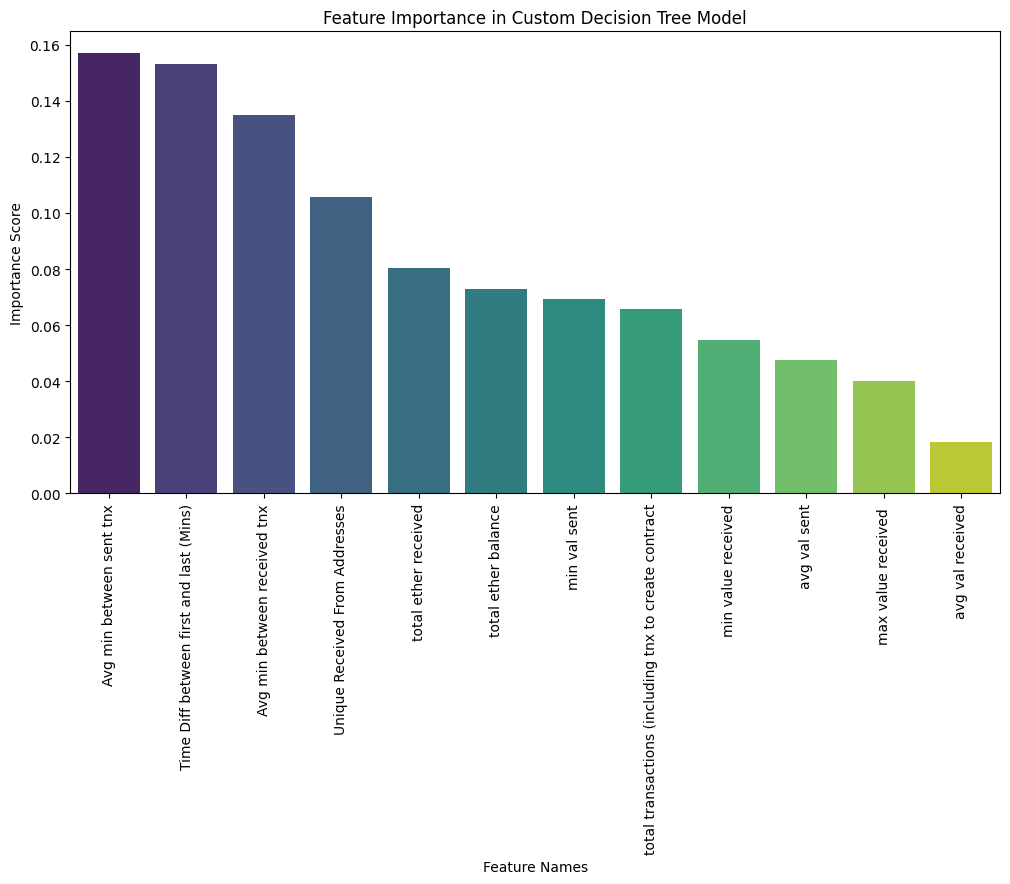

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.48548 to fit


Custom Decision Tree Performance with gini criterion:
Accuracy: 0.8976
Precision: 0.9103
Recall: 0.8628
F1 Score: 0.8859
Confusion Matrix:
 [[1415  111]
 [ 179 1126]]

Scikit-Learn Decision Tree Performance with gini criterion:
Accuracy: 0.9050
Precision: 0.9066
Recall: 0.8851
F1 Score: 0.8957
Confusion Matrix:
 [[1407  119]
 [ 150 1155]]


In [ ]:
import graphviz
def extract_feature_importances(tree, feature_names):
    feature_counts = {}
    
    def traverse(node):
        if isinstance(node, tuple):
            feature_idx, val, left, right = node
            feature_name = feature_names[feature_idx]
            feature_counts[feature_name] = feature_counts.get(feature_name, 0) + 1
            traverse(left)
            traverse(right)
    
    traverse(tree.tree)
    
    total_splits = sum(feature_counts.values())
    feature_importance = {k: v / total_splits for k, v in feature_counts.items()}
    return feature_importance

def plot_feature_importance(tree, feature_names):
    feature_importance = extract_feature_importances(tree, feature_names)
    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=[f[0] for f in sorted_features], y=[f[1] for f in sorted_features], palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel("Feature Names")
    plt.ylabel("Importance Score")
    plt.title("Feature Importance in Custom Decision Tree Model")
    plt.show()


def visualize_tree(node, feature_names, dot=None, parent=None, edge_label=""):
    
    if dot is None:
        dot = graphviz.Digraph()

    node_id = str(id(node)) 
    if isinstance(node, np.int64) or isinstance(node, int):
        node_label = f"Class: {node}"
    else:
        feature_idx, val, left, right = node
        node_label = f"{feature_names[feature_idx]} <= {val}"
    
        visualize_tree(left, feature_names, dot, node_id, "Yes")
        visualize_tree(right, feature_names, dot, node_id, "No")

    dot.node(node_id, label=node_label)

    if parent is not None:
        dot.edge(parent, node_id, label=edge_label)

    return dot




for criterion in criteria:
    custom_tree = DecisionTreeCustom(max_depth=10, min_samples_split=2, criterion=criterion)
    custom_tree.fit(X_train, y_train)
    y_pred_custom = custom_tree.predict(X_test)
    plot_feature_importance(custom_tree, cols)
    dot = visualize_tree(custom_tree.tree, cols)
    dot.render("decision_tree", format="png") 
    acc, prec, rec, f1, conf_matrix = compute_metrics(y_test, y_pred_custom)

    print(f"Custom Decision Tree Performance with {criterion} criterion:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:\n", conf_matrix)

    sklearn_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=2, criterion=criterion, random_state=42)
    sklearn_tree.fit(X_train, y_train)
    y_pred_sklearn = sklearn_tree.predict(X_test)

    acc_sklearn, prec_sklearn, rec_sklearn, f1_sklearn, conf_matrix_sklearn = compute_metrics(y_test, y_pred_sklearn)

    print(f"\nScikit-Learn Decision Tree Performance with {criterion} criterion:")
    print(f"Accuracy: {acc_sklearn:.4f}")
    print(f"Precision: {prec_sklearn:.4f}")
    print(f"Recall: {rec_sklearn:.4f}")
    print(f"F1 Score: {f1_sklearn:.4f}")
    print("Confusion Matrix:\n", conf_matrix_sklearn)